In [46]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


In [62]:
nyt_data = pd.read_csv('NYTGeneraldata1.csv')

In [65]:
nyt_data['pub_date']=pd.to_datetime(nyt_data['pub_date'])
nyt_data

,Unnamed: 0,abstract,headline,pub_date
0,0,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019.",thailand reopens to tourists from 63 countries without requiring quarantine.,2021-11-01 12:26:03+00:00
1,1,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”",a 6-hour opera in a pandemic? the met goes for it.,2021-11-01 14:14:46+00:00
2,2,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes.",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00
3,3,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow.",the biden administration will publish vaccine mandate rules ‘in the coming days.’,2021-11-01 16:29:36+00:00
4,4,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india.","the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia.",2021-11-01 16:40:48+00:00
...,...,...,...,...
361,361,"the company said that analyses and modeling of mutations in the variant suggest that they may weaken the effect of the treatment, but that studies using omicron’s full sequences are incomplete.","regeneron says its antibody treatment may not be as effective against omicron, but testing is underway.",2021-11-30 16:03:10+00:00
362,362,"intense research into the new coronavirus variant first identified in southern africa, has just begun. world leaders have urged people not to panic — and to get vaccinated, if they can.",omicron: what is known — and still unknown,2021-11-30 17:08:17+00:00
363,363,"britain’s approach to coronavirus-related restrictions has been looser than other european countries, but the omicron variant has spurred swift action on mitigation measures.","amid variant fears, u.k. discovers limits to its virus strategy",2021-11-30 18:14:44+00:00
364,364,"unlike alpha, beta and delta, the name of the latest known variant is not as straightforward, with some english speakers offering up diverse pronunciations.",how do you say ‘omicron’?,2021-11-30 18:51:06+00:00


In [66]:
def sentiment_func(headline): 
    try: 
        return TextBlob(headline).sentiment 
    except:
        return None

In [67]:
nyt_data["pol_sub_headline"] = nyt_data["headline"].apply(sentiment_func)

In [68]:
#adding a column for polarity and one for subjectivity
nyt_data['polarity_headline'] = [i[0] for i in nyt_data['pol_sub_headline']]
nyt_data['subjectivity_headline'] = [i[1] for i in nyt_data['pol_sub_headline']]


In [69]:
#deleting column pol_sub
del nyt_data['pol_sub_headline']

#reading text full lenght
pd.set_option('display.max_colwidth', None)


In [70]:
nyt_data

,Unnamed: 0,abstract,headline,pub_date,polarity_headline,subjectivity_headline
0,0,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019.",thailand reopens to tourists from 63 countries without requiring quarantine.,2021-11-01 12:26:03+00:00,0.00,0.000000
1,1,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”",a 6-hour opera in a pandemic? the met goes for it.,2021-11-01 14:14:46+00:00,0.00,0.000000
2,2,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes.",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00,0.00,0.000000
3,3,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow.",the biden administration will publish vaccine mandate rules ‘in the coming days.’,2021-11-01 16:29:36+00:00,0.00,0.000000
4,4,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india.","the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia.",2021-11-01 16:40:48+00:00,0.25,0.333333
...,...,...,...,...,...,...
361,361,"the company said that analyses and modeling of mutations in the variant suggest that they may weaken the effect of the treatment, but that studies using omicron’s full sequences are incomplete.","regeneron says its antibody treatment may not be as effective against omicron, but testing is underway.",2021-11-30 16:03:10+00:00,0.60,0.800000
362,362,"intense research into the new coronavirus variant first identified in southern africa, has just begun. world leaders have urged people not to panic — and to get vaccinated, if they can.",omicron: what is known — and still unknown,2021-11-30 17:08:17+00:00,-0.10,0.600000
363,363,"britain’s approach to coronavirus-related restrictions has been looser than other european countries, but the omicron variant has spurred swift action on mitigation measures.","amid variant fears, u.k. discovers limits to its virus strategy",2021-11-30 18:14:44+00:00,0.00,0.000000
364,364,"unlike alpha, beta and delta, the name of the latest known variant is not as straightforward, with some english speakers offering up diverse pronunciations.",how do you say ‘omicron’?,2021-11-30 18:51:06+00:00,0.00,0.000000


In [71]:
mean_polarity_headline = nyt_data['polarity_headline'].mean()
mean_subjectivity_headline = nyt_data['subjectivity_headline'].mean()
print(mean_polarity_headline,mean_subjectivity_headline)

0.022173698341731128 0.18083834539777166


In [72]:
# Creating dataframe containing the polarity value and headline
sentiment_df = pd.DataFrame(nyt_data, columns=["polarity_headline", "headline"])
sentiment_df.head()

,polarity_headline,headline
0,0.00,thailand reopens to tourists from 63 countries without requiring quarantine.
1,0.00,a 6-hour opera in a pandemic? the met goes for it.
2,0.00,how the pandemic has added to labor unrest
3,0.00,the biden administration will publish vaccine mandate rules ‘in the coming days.’
4,0.25,"the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia."


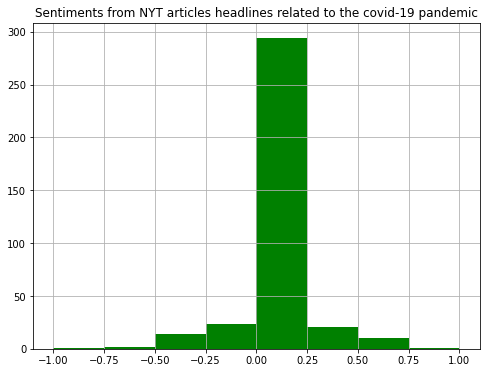

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from NYT articles headlines related to the covid-19 pandemic")
plt.show()

In [89]:
def sentiment_func(abstract): 
    try: 
        return TextBlob(abstract).sentiment 
    except:
        return None

In [90]:
nyt_data["pol_sub_abstract"] = nyt_data["abstract"].apply(sentiment_func)

In [91]:
#adding a column for polarity and one for subjectivity
nyt_data['polarity_abstract'] = [i[0] for i in nyt_data['pol_sub_abstract']]
nyt_data['subjectivity_abstract'] = [i[1] for i in nyt_data['pol_sub_abstract']]

In [92]:
#deleting column pol_sub
del nyt_data['pol_sub_abstract']

#reading text full lenght
pd.set_option('display.max_colwidth', None)

nyt_data.head()

,Unnamed: 0,abstract,headline,pub_date,polarity_headline,subjectivity_headline,polarity_abstract,subjectivity_abstract
0,0,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019.",thailand reopens to tourists from 63 countries without requiring quarantine.,2021-11-01 12:26:03+00:00,0.00,0.000000,0.300000,0.450000
1,1,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”",a 6-hour opera in a pandemic? the met goes for it.,2021-11-01 14:14:46+00:00,0.00,0.000000,0.000000,0.150000
2,2,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes.",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00,0.00,0.000000,0.087273,0.290909
3,3,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow.",the biden administration will publish vaccine mandate rules ‘in the coming days.’,2021-11-01 16:29:36+00:00,0.00,0.000000,-0.033333,0.133333
4,4,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india.","the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia.",2021-11-01 16:40:48+00:00,0.25,0.333333,0.250000,0.333333


In [78]:
mean_polarity_abstract = nyt_data['polarity_abstract'].mean()
mean_subjectivity_abstract = nyt_data['subjectivity_abstract'].mean()
print(mean_polarity_abstract,mean_subjectivity_abstract)

0.07235640728343369 0.3130675787057845


In [79]:
# Creating dataframe containing the polarity value and headline
sentiment_df_abstract = pd.DataFrame(nyt_data, columns=["polarity_abstract", "abstract"])
sentiment_df_abstract.head()

,polarity_abstract,abstract
0,0.300000,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019."
1,0.000000,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”"
2,0.087273,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes."
3,-0.033333,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow."
4,0.250000,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india."


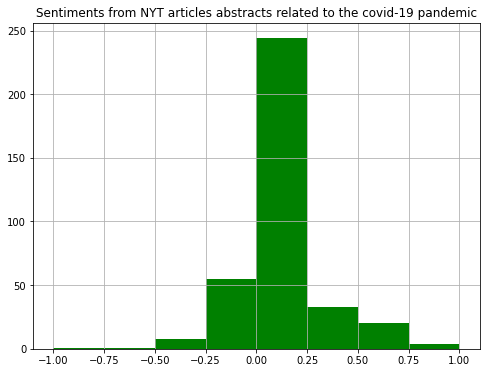

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram
sentiment_df_abstract.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
                           ax=ax,
                           color="green")

plt.title("Sentiments from NYT articles abstracts related to the covid-19 pandemic")
plt.show()